In [53]:
import json
import networkx as nx
import pymorphy2
from nltk.corpus import stopwords

In [4]:
with open("../data/corpus_as_dict_of_norms.json") as f:
    corpus = json.load(f)

In [5]:
a = []
for i in range(len(corpus)):
    a.extend(list(corpus.values())[i])

In [7]:
len(a)

34642

In [9]:
morph = pymorphy2.MorphAnalyzer()

In [22]:
words = [word for word in a if morph.parse(word)[0].tag.POS == 'NOUN']

In [23]:
len(words)

14901

In [41]:
stops = stopwords.words("english") + stopwords.words("russian") + ["это", "который", "наш", "мочь", "год", 
                                            "такой", "знать", "мы", "свой", "один", "другой", "хотеть",
                                            "человек", "всё", "все", "весь", "очень", "думать", "нужно",
                                            "большой", "время", "использовать", "говорить", "сказать",
                                            "иметь", "сделать", "первый", "каждый", "день", "её", "ваш",
                                            "стать", "больший", "ваше", "день", "самый", "понять",
                                            "просто", "ещё", "проблема", "также", "например", "м", "c"]

In [271]:
words = [word for word in words if word not in stops]  # Удаляем стоп слова

In [43]:
from collections import Counter

In [44]:
cnt = dict(Counter(words))

In [45]:
cnt = {k: v for k, v in sorted(cnt.items(), key=lambda item: item[1], reverse=True)}

Запишем в массивы 100 самых популярных слов и сколько раз они встречаются

In [287]:
top_words = list(cnt.keys())[:100]

In [288]:
nodes_sizes = list(cnt.values())[:100]

In [289]:
import matplotlib.pyplot as plt

In [290]:
nodes_sizes = list(map(lambda x: x*10, nodes_sizes))

In [291]:
edges = []
for word in top_words:
    for second_word in top_words:
        count = 0
        if word != second_word:
            for doc in list(corpus.values()):
                if word and second_word in doc:
                    count += 1
            edges.append((word, second_word, count))
edges = [edge for edge in edges if edge[2] >= 2]

Все узлы графа

In [292]:
len(edges)

9900

Создаём граф

In [293]:
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [294]:
pos = nx.spring_layout(G)

In [295]:
labels = {}
for i in edges:
    labels[(i[0],i[1])] = i[2]

In [296]:
widths = list(map(lambda x: x*0.01, list(labels.values())))

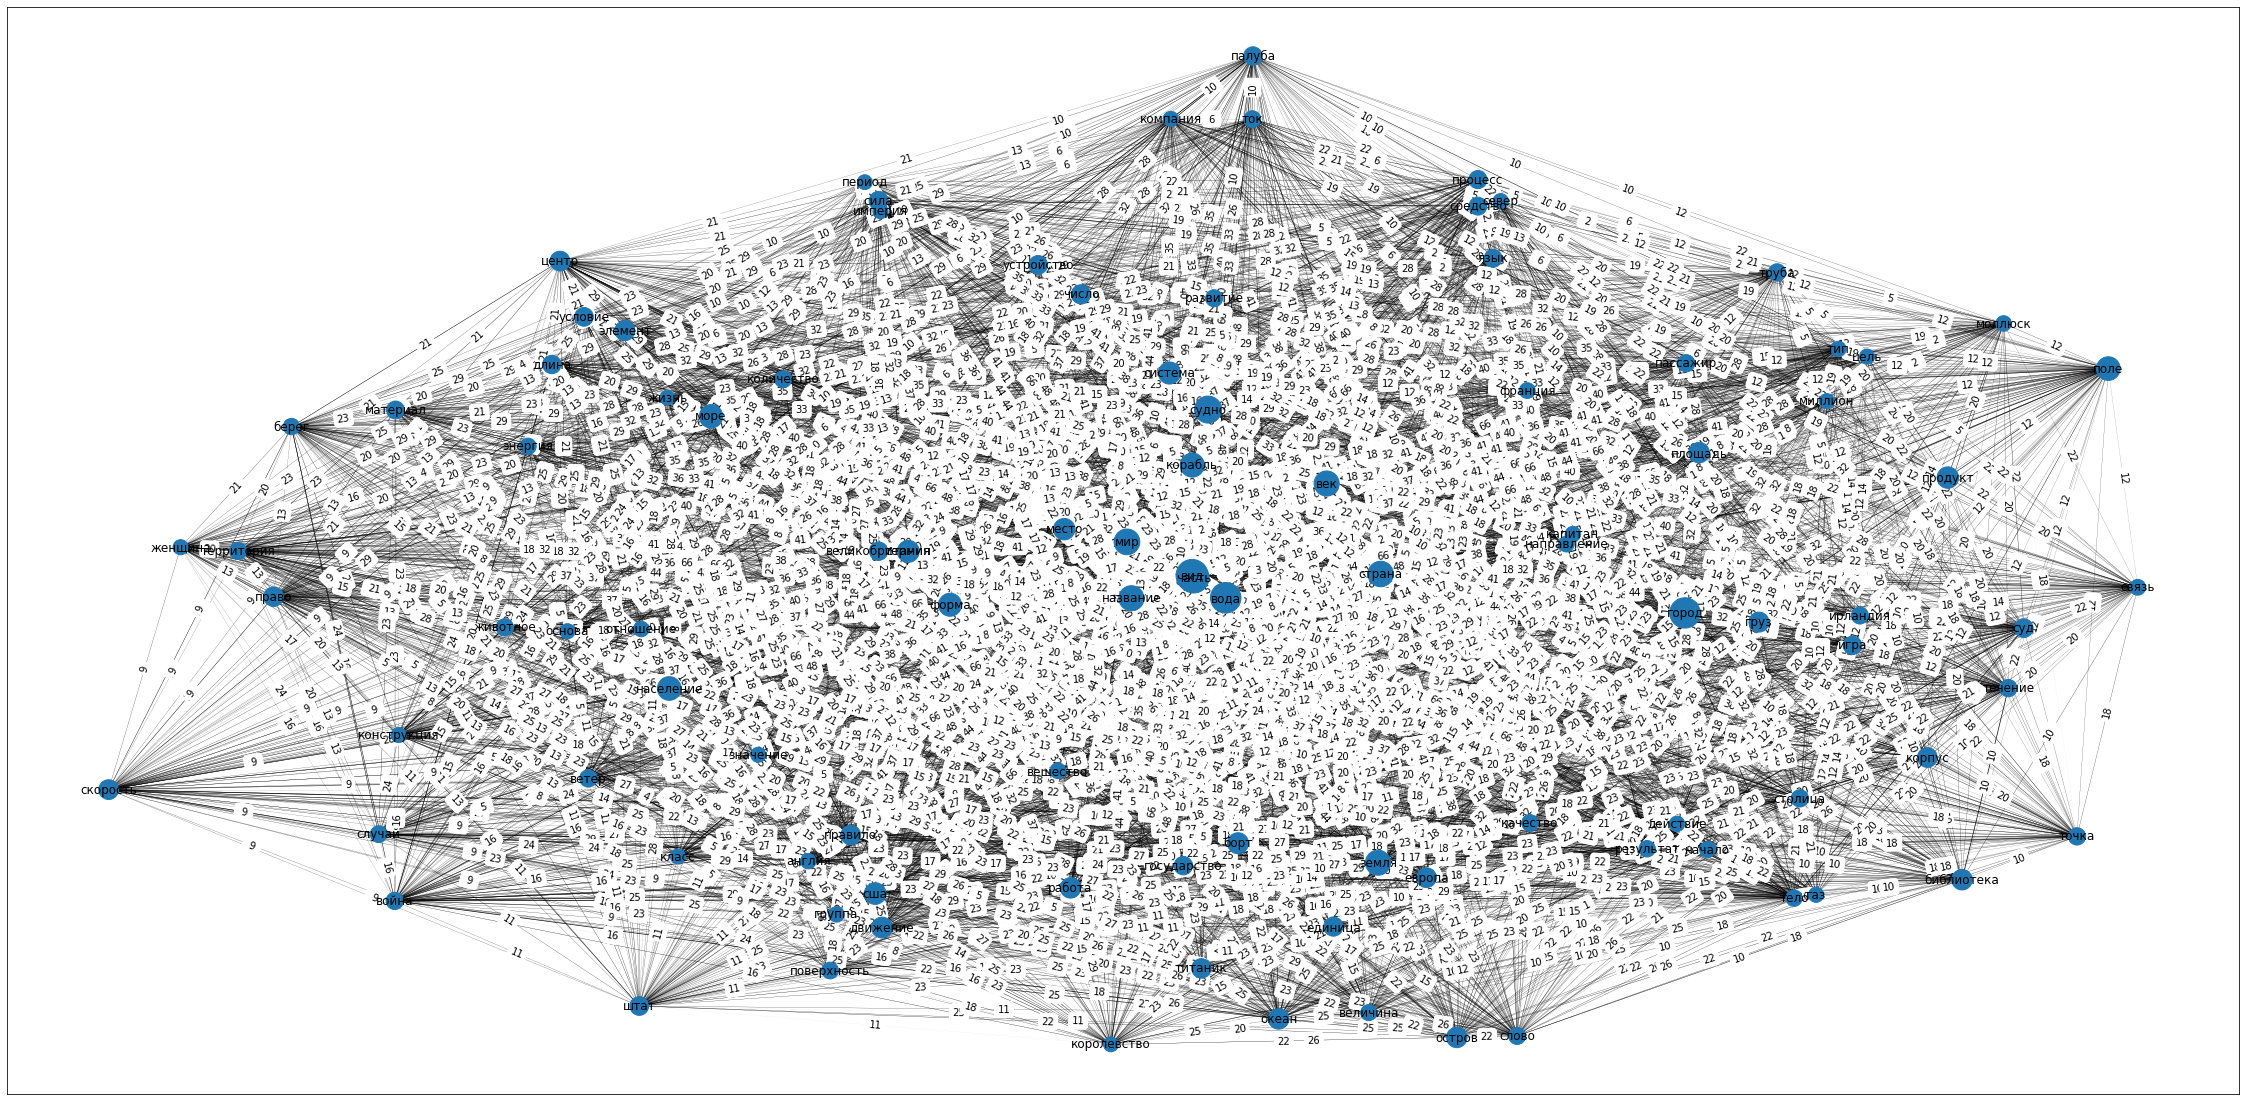

In [297]:
plt.figure(figsize=(40,20))
nx.draw_networkx(G, pos,  node_size=nodes_sizes, with_labels=True, width=widths)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

Вот как выглядит граф с 100 узлами. Картина, мягко говоря, не очень

Попробуем граф для 10 ключевых слов

In [228]:
short_top_words = top_words[:10]
short_nodes_sizes = nodes_sizes[:10]

In [255]:
s_edges = []
for word in short_top_words:
    for second_word in short_top_words:
        count = 0
        if word != second_word:
            for doc in list(corpus.values()):
                if word and second_word in doc:
                    count += 1
            s_edges.append((word, second_word, count))
s_edges = [edge for edge in s_edges if edge[2] >= 2]

In [256]:
len(s_edges)

90

In [233]:
F = nx.Graph()
F.add_weighted_edges_from(s_edges)

In [234]:
pos = nx.spring_layout(F)

In [235]:
s_labels = {}
for i in s_edges:
    s_labels[(i[0],i[1])] = i[2]

In [236]:
short_nodes_sizes

[1030, 940, 930, 920, 730, 660, 650, 630, 630, 630]

In [272]:
short_nodes_sizes = list(map(lambda x: x*1.5, short_nodes_sizes))

In [269]:
s_widths = list(map(lambda x: x*0.05, list(s_labels.values())))

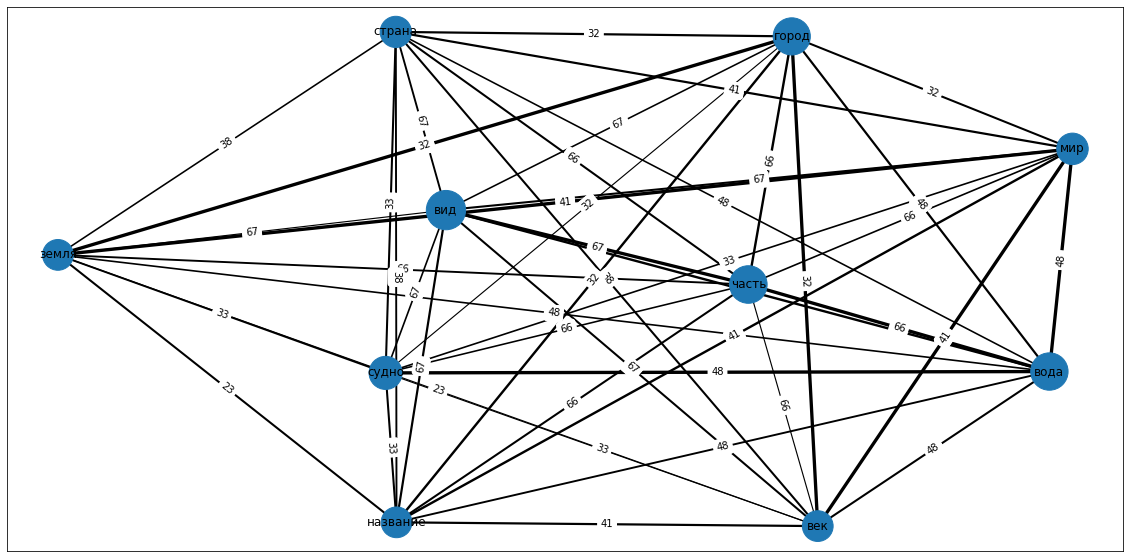

In [273]:
plt.figure(figsize=(20,10))
nx.draw_networkx(F, pos,  node_size=short_nodes_sizes, with_labels=True, width=s_widths)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=s_labels)
plt.show()

Тут уже более понятный граф :)